<a href="https://colab.research.google.com/github/Cordero27/Minor-Machine-Learning/blob/main/S07-Linear-Models/Tarea_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Regresion Lineal aplicada a datos de automóviles

En esta tarea usted debe investigar acerca del conjunto de datos [auto mpg](https://seaborn.pydata.org/examples/scatter_bubbles.html) perteneciente a la libreria [seaborn](https://seaborn.pydata.org/)

**Objetivo**: Estimar el rendimiento promedio de automoviles usando regresión lineal

1) (1 punto) Establecer una visualización de los datos a través de un [Gráfico de dispersión](https://seaborn.pydata.org/tutorial/axis_grids.html)

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

sns.set_theme(style="white")

# Cargamos el dataset
mpg = sns.load_dataset("mpg")
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [2]:
#Notamos que las columnas NO tienen el mismo largo, por lo que debemos balancear las columnas del dataframe
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [3]:
#Verificamos si existen NAs en el dataset, realizando una sumatoria por columna de la cantidad de NAs que posee.
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [4]:
#Para balancear las columnas eliminaremos las filas del dataset que contengan al menos un NA, pues su presencia alteran los resultados.
#Guardaremos el dataset modificado en un dataframe llamado mpgWONA (mpg WithOut NA).
mpgWONA =  mpg.dropna()

In [5]:
#Verificamos que no existen NAs en el dataset
mpgWONA.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [17]:
#Identificamos que las variables que no son numericas son de tipo "object", por lo cual debemos transformarlas a tipo "category"
mpgWONA.loc[:, ("origin")] = pd.Categorical(mpgWONA.loc[:, ("origin")])
mpgWONA.loc[:, ("name")] = pd.Categorical(mpgWONA.loc[:, ("name")])
mpgWONA.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           392 non-null    float64 
 1   cylinders     392 non-null    int64   
 2   displacement  392 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        392 non-null    int64   
 5   acceleration  392 non-null    float64 
 6   model_year    392 non-null    int64   
 7   origin        392 non-null    category
 8   name          392 non-null    category
dtypes: category(2), float64(4), int64(3)
memory usage: 36.2 KB


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [18]:
#Con el dataset más limpio podemos realizar calculos estadísticos de las columnas contínuas.
mpgWONA.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [19]:
#El próximo paso es normalizar las features contínuas, para que los resultados no se vean alterados con los sesgos.
#Para esto usamos el metodo de minimo-máximo, el cual trabaja con el mínimo, máximo y rango de la colúmna.

mpgNormalized = mpgWONA.copy()
  
mpgNormalized["mpg"] = (mpgNormalized["mpg"] - mpgNormalized["mpg"].min()) / (mpgNormalized["mpg"].max() - mpgNormalized["mpg"].min())    
mpgNormalized["cylinders"] = (mpgNormalized["cylinders"] - mpgNormalized["cylinders"].min()) / (mpgNormalized["cylinders"].max() - mpgNormalized["cylinders"].min())    
mpgNormalized["displacement"] = (mpgNormalized["displacement"] - mpgNormalized["displacement"].min()) / (mpgNormalized["displacement"].max() - mpgNormalized["displacement"].min())    
mpgNormalized["horsepower"] = (mpgNormalized["horsepower"] - mpgNormalized["horsepower"].min()) / (mpgNormalized["horsepower"].max() - mpgNormalized["horsepower"].min())    
mpgNormalized["weight"] = (mpgNormalized["weight"] - mpgNormalized["weight"].min()) / (mpgNormalized["weight"].max() - mpgNormalized["weight"].min())    
mpgNormalized["acceleration"] = (mpgNormalized["acceleration"] - mpgNormalized["acceleration"].min()) / (mpgNormalized["acceleration"].max() - mpgNormalized["acceleration"].min())    
mpgNormalized["model_year"] = (mpgNormalized["model_year"] - mpgNormalized["model_year"].min()) / (mpgNormalized["model_year"].max() - mpgNormalized["model_year"].min())    

display(mpgNormalized)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,2,48
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,2,35
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,2,229
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,2,13
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,2,159
...,...,...,...,...,...,...,...,...,...
393,0.478723,0.2,0.186047,0.217391,0.333711,0.452381,1.0,2,151
394,0.930851,0.2,0.074935,0.032609,0.146583,0.988095,1.0,0,297
395,0.611702,0.2,0.173127,0.206522,0.193365,0.214286,1.0,2,118
396,0.505319,0.2,0.134367,0.179348,0.286929,0.630952,1.0,2,157


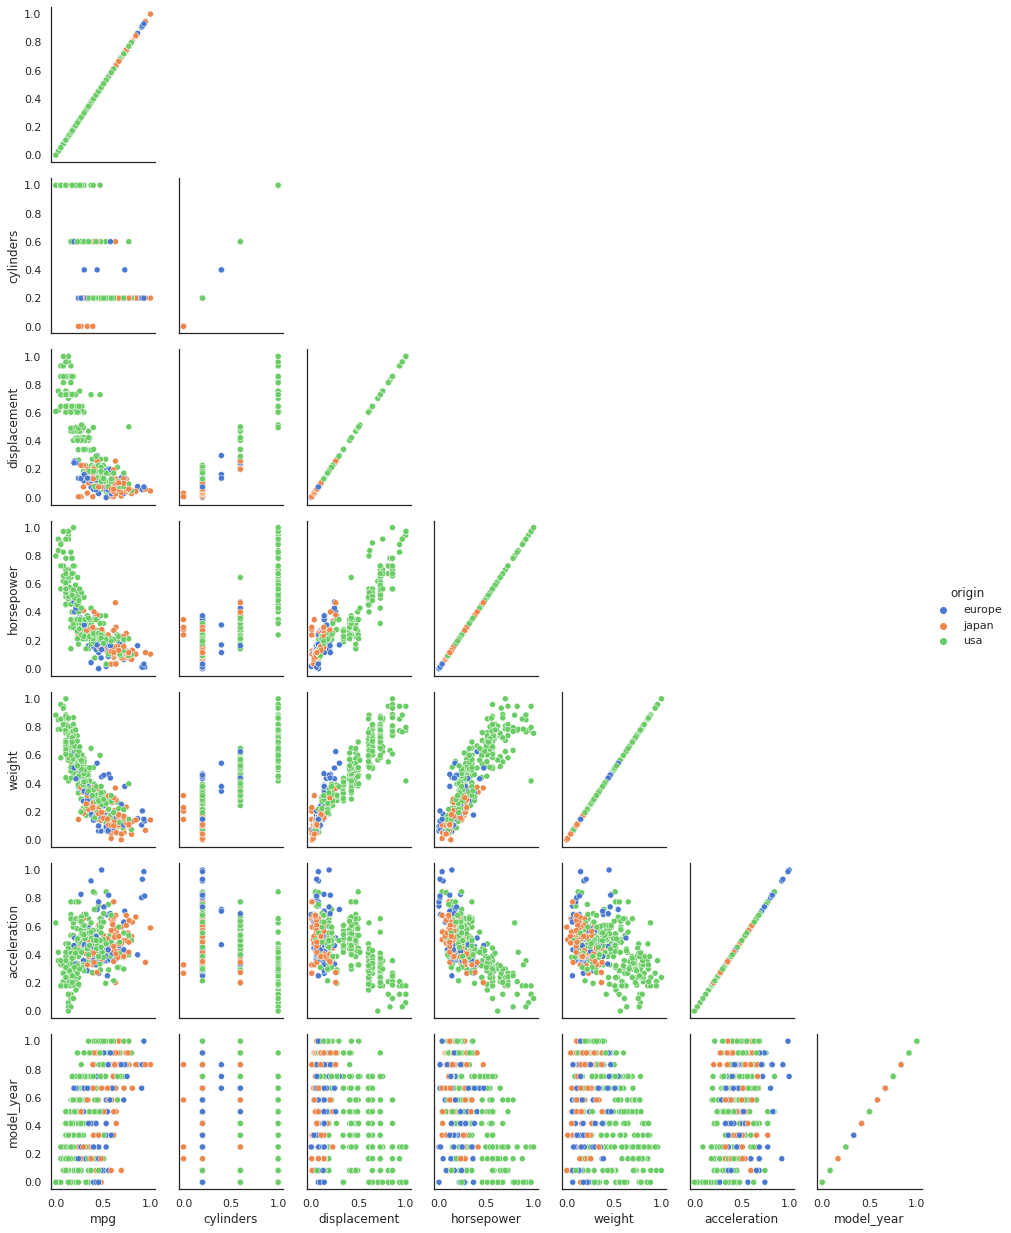

In [12]:
#Dibujamos los gráficos de dispersión (se evita dibujar el triangulo superior derecho para no repertir gráficas alivianar la carga al procesador)
graph = sns.PairGrid(mpgNormalized, hue="origin", palette="muted", aspect=.75, corner=True)
graph.map(sns.scatterplot)
graph.add_legend()

2) (1 punto) Investigar e incluir un grafico de correlacion ([Correlation Plot](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)) para visualizar la dependencia entre los datos 

Text(0.5, 1.0, 'Correlation plot')

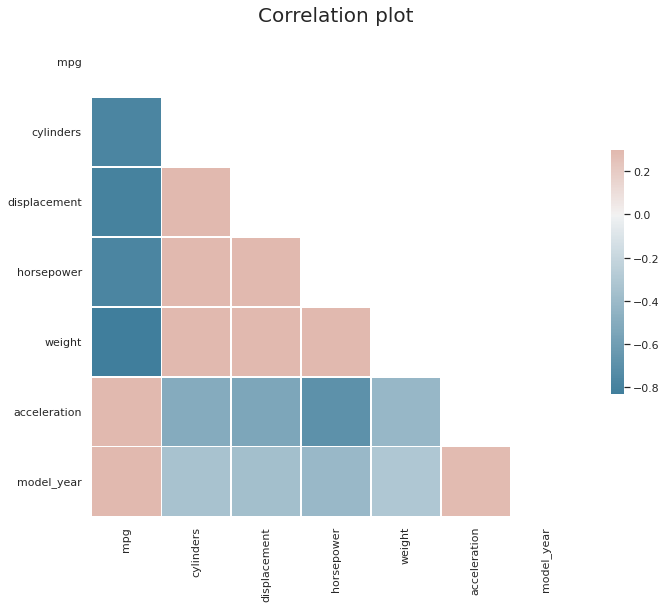

In [20]:
# Construimos la matriz de correlacion
corr = mpgNormalized.corr()

#Creamos una "mascara" para ocultar el triangulo superior derecho, el cual repite las gráficas del triangulo inferior izquierdo
mask = np.triu(np.ones_like(corr, dtype=bool))

# Definimos el tamaño del gráfico de la matriz
f, ax = plt.subplots(figsize=(11, 9))

# Creamos la paleta de colores del gráfico de la matriz
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Dibujamos el gráfico que contiene la matriz de correlación
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation plot", size=20)

3) (1 punto) Construir y entrenar un modelo de regresion lineal


In [21]:
#Ahora que ya tenemos las variables como tipo "category" podemos transformarlas a números enteros 
mpgNormalized.loc[:, ("origin")] = mpgNormalized.origin.cat.codes
mpgNormalized.loc[:, ("name")] = mpgNormalized.name.cat.codes
#Normalizamos las columnas anteriores
mpgNormalized["origin"] = (mpgNormalized["origin"] - mpgNormalized["origin"].min()) / (mpgNormalized["origin"].max() - mpgNormalized["origin"].min())    
mpgNormalized["name"] = (mpgNormalized["name"] - mpgNormalized["name"].min()) / (mpgNormalized["name"].max() - mpgNormalized["name"].min())   
mpgNormalized

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,1.0,0.160000
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,1.0,0.116667
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,1.0,0.763333
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,1.0,0.043333
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,1.0,0.530000
...,...,...,...,...,...,...,...,...,...
393,0.478723,0.2,0.186047,0.217391,0.333711,0.452381,1.0,1.0,0.503333
394,0.930851,0.2,0.074935,0.032609,0.146583,0.988095,1.0,0.0,0.990000
395,0.611702,0.2,0.173127,0.206522,0.193365,0.214286,1.0,1.0,0.393333
396,0.505319,0.2,0.134367,0.179348,0.286929,0.630952,1.0,1.0,0.523333


In [24]:
#Una vez normalizado podemos dividir el dataset en 2.
#Primero, dividimos del dataset en columnas independientes y dependientes ("operadoras" y "resultado").
#En este caso, clasificaremos a los pingüinos por sexo, por lo que será esta la feature a predecir.
X = mpgNormalized.iloc[:, 1:8]
y = mpgNormalized.iloc[:, 0]
#Luego dividimos el dataset completo en conjunto de entrenamiento y pruebas, donde este ultimo será el 20% del conjunto
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [29]:
LR = LinearRegression()
# Ajustamos el modelo
LR.fit(X_train, y_train)

LinearRegression()

In [31]:
#Obtenemos la predicción
y_prediction =  LR.predict(X_test)
y_prediction

array([ 0.45046904,  0.4389882 ,  0.03742758,  0.62633685,  0.61980513,
        0.38456844,  0.65379972,  0.47677923,  0.30240414,  0.44882796,
        0.52999687,  0.12662821,  0.4274325 , -0.01764018,  0.20646579,
        0.61935016,  0.48134578,  0.09786417,  0.47195461,  0.48195508,
        0.32344803,  0.23273497,  0.3937927 ,  0.48687539,  0.6398928 ,
        0.05822541,  0.52967478,  0.44449921,  0.37351464,  0.16027891,
        0.33487669,  0.55752619,  0.42628766,  0.54530548,  0.34385504,
        0.51684436,  0.49579492,  0.07800789,  0.15558311,  0.04137844,
        0.13499294,  0.65926513,  0.55180028,  0.12079928,  0.61545245,
        0.17003558,  0.56507131,  0.03727995,  0.22860796,  0.35272537,
        0.50274776,  0.17035513, -0.01178395,  0.37452223,  0.63432894,
        0.48816712,  0.45968505,  0.31279563,  0.58130141,  0.41036467,
        0.26787432,  0.52149029,  0.62516771,  0.0387265 ,  0.47701438,
        0.20111868,  0.04169018,  0.53971289,  0.34486351,  0.62

4) (1 punto) Mostrar estadistiscas de desempeño del modelo (investigar)

5) (1 punto) Mostrar [graficamente la lineas rectas](https://seaborn.pydata.org/tutorial/regression.html) en un grafico de dispersión para el par de variables que presentan la mayor correlacion. esta informacion la obtiene del correlation plot. realizar un grafico de dispersion con las variables mas correlacionadas.


6) (1 punto) [Guardar el Jupyter notebook resultante en su cuenta propia de Github ](https://bebi103a.github.io/lessons/02/git_with_colab.html) y compartir el enlace en la pagina de la tarea en Educandus.